Connected to aula2amb (Python 3.12.2)

In [138]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o shapefile do mapa mundial
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


C:\Users\estev\AppData\Local\Temp\ipykernel_14504\2876468339.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [142]:
country = pd.read_csv('out_dt\country_pt.csv')
portuguese = pd.read_csv('out_dt\coutry_portuguese.csv')
junto = portuguese.join(country, how='left', on=None)
data = pd.read_csv('exportacao_paises.csv')
data_country = data.merge(junto, on='pais', how='left')
data_country.loc[52, "country"] = "United States of America"
data_country.loc[1, "country"] = "Germany"
dt_country = data_country.drop(columns='pais', errors=False)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\estev\AppData\Local\Temp\ipykernel_14504\2112713117.py:1: SyntaxWarning: invalid escape sequence '\c'
  country = pd.read_csv('out_dt\country_pt.csv')
C:\Users\estev\AppData\Local\Temp\ipykernel_14504\2112713117.py:2: SyntaxWarning: invalid escape sequence '\c'
  portuguese = pd.read_csv('out_dt\coutry_portuguese.csv')


In [143]:

print(world[world['name'] == 'Paraguay'])
print(junto[junto['country'] == 'Paraguay'])
print(dt_country[dt_country['country'] == 'Paraguay'])

       pop_est      continent      name iso_a3  gdp_md_est  \
156  7044636.0  South America  Paraguay    PRY       38145   

                                              geometry  
156  POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...  
         pais   country
103  Paraguai  Paraguay
      valor_us$   country
100  42862206.0  Paraguay


In [144]:


print(dt_country.shape[0])
dt_country = dt_country[dt_country['country'] != 'Brazil']
# dt_country = dt_country[dt_country['country'] != 'Paraguay']
print(dt_country.shape[0])



136
135


In [145]:

# Mesclar o DataFrame de vendas com o GeoDataFrame do mapa mundial
world = world.merge(dt_country, how='left', left_on='name', right_on='country')



In [146]:
# Substituir valores NaN (caso algum país não tenha vendas registradas)
world['valor_us$'] = world['valor_us$'].fillna(0)
world


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,valor_us$,country
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0,Tanzania
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1059120.0,Canada
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",707581.0,United States of America
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.0,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",131.0,Montenegro
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.0,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",4320.0,Trinidad and Tobago


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\estev\AppData\Local\Temp\ipykernel_14504\4222020596.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(world.geometry.centroid.x, world.geometry.centroid.y, world['valor_us$']):


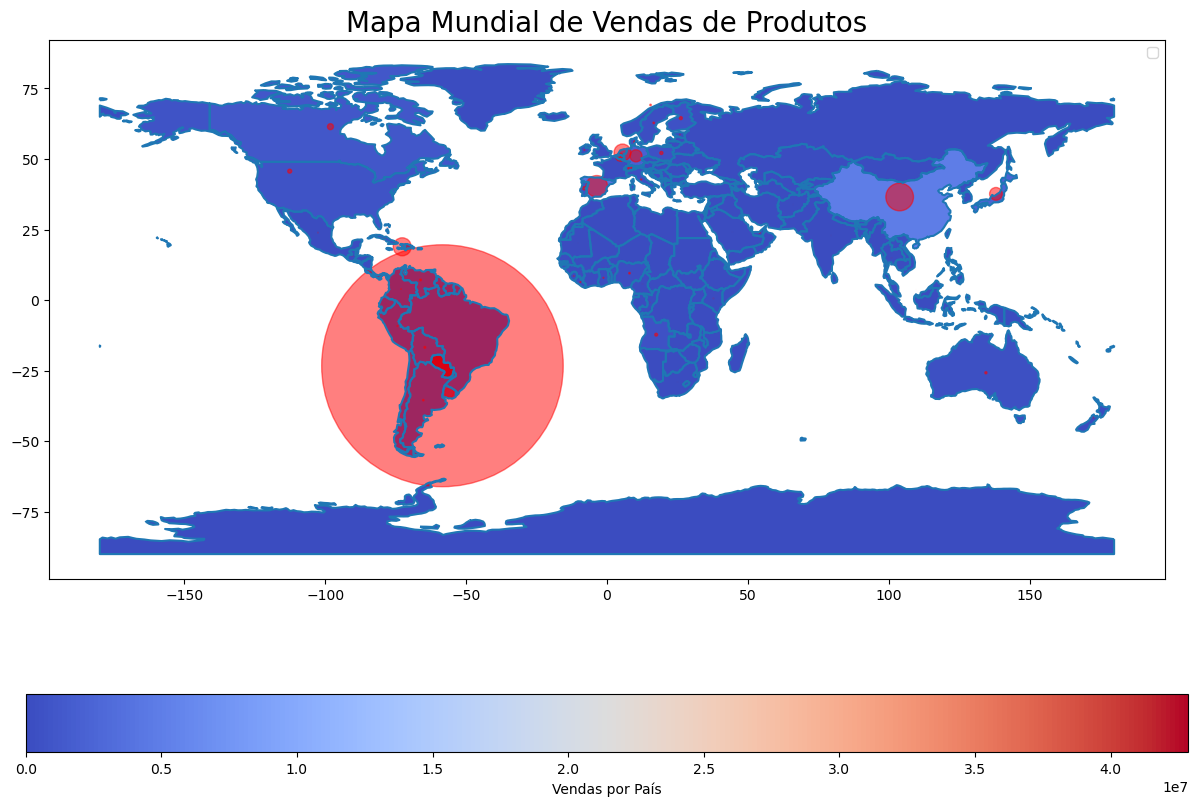

In [147]:
# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='valor_us$', ax=ax, legend=True, legend_kwds={'label': "Vendas por País", 'orientation': "horizontal"},
           cmap='coolwarm', missing_kwds={"color": "lightgrey"})

# Adicionando legenda
ax.legend()
# Adicionar círculos proporcionais às vendas
for x, y, label in zip(world.geometry.centroid.x, world.geometry.centroid.y, world['valor_us$']):
    size = label / 1000000  # Ajustar o fator de escala conforme necessário
    circle = plt.Circle((x, y), size, color='red', fill=True, alpha=0.5)
    ax.add_patch(circle)

# Configurar o título do mapa
ax.set_title('Mapa Mundial de Vendas de Produtos', fontdict={'fontsize': 20}, loc='center')

plt.show()

c:\Users\estev\anaconda3\envs\aula2amb\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


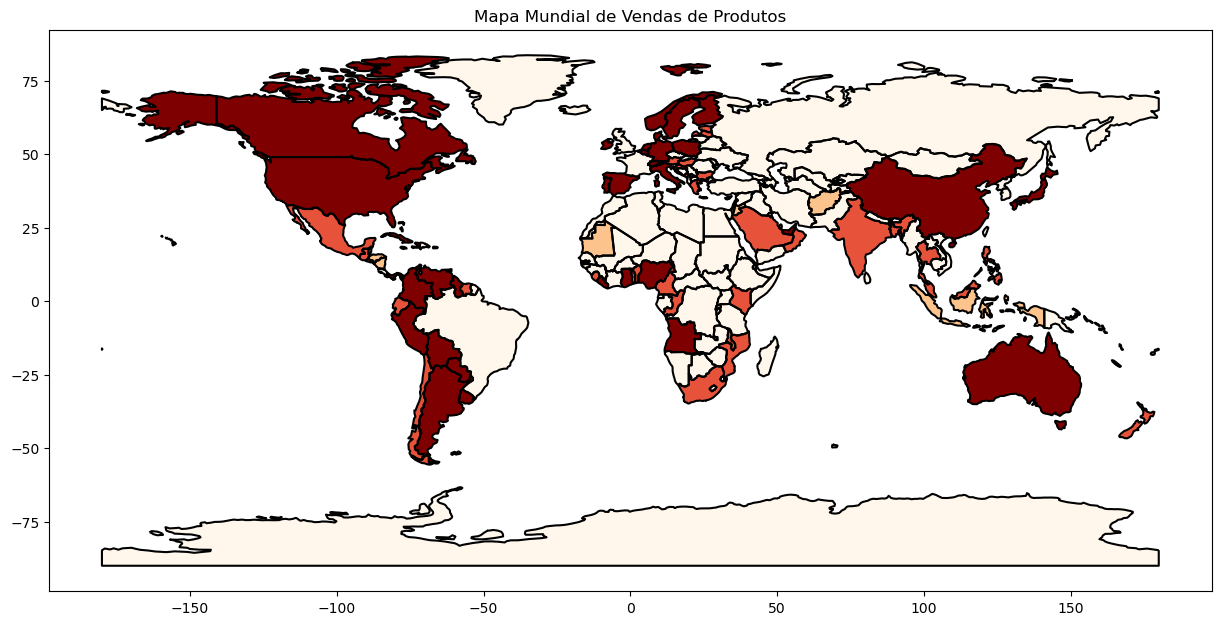

In [148]:
fig, ax = plt.subplots(figsize=(15, 10))
# Plotar as bordas dos países com uma cor específica
world.boundary.plot(ax=ax, edgecolor='black')
world.plot(column='valor_us$',ax=ax, cmap='OrRd', scheme='quantiles', figsize=(15, 10))
plt.title('Mapa Mundial de Vendas de Produtos')
plt.show()

9
177


c:\Users\estev\anaconda3\envs\aula2amb\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 9 classes. Setting k to 5.
  warnings.warn(


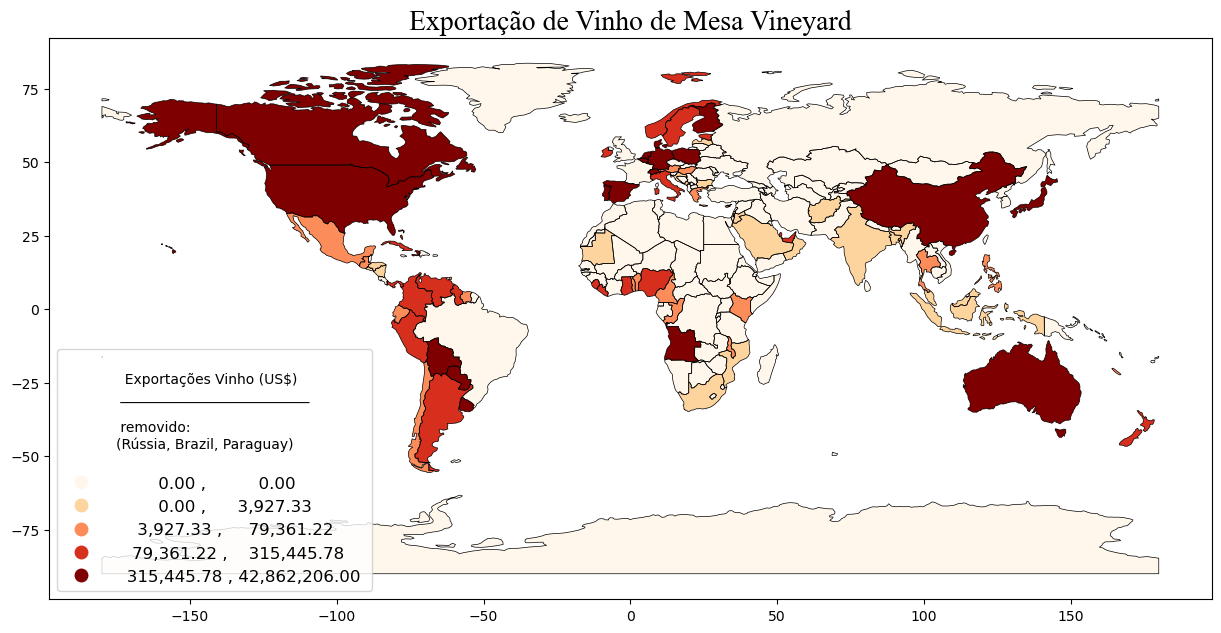

In [149]:
# Calcular o número de classes usando a regra de Sturges
n = len(world['valor_us$'].dropna())  # Número de observações
k = int(np.ceil(1 + np.log2(n)))  # Número de classes
print(k)
print(n)
# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotar os boundaries do mapa
world.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)

world.plot(column='valor_us$', ax=ax, legend=True, legend_kwds={'title': '\n  Exportações Vinho (US$) \n ___________________________ \n\n removido: \n(Rússia, Brasil)\n',
                                                                 'fmt':'{:,.2f} ',
                                                                   'loc':'lower left',
                                                                   'fontsize' : '12'},
           cmap='OrRd', missing_kwds={"color": "lightgrey"}, scheme='quantiles', k=k)

# Configurar o título do mapa
ax.set_title('Exportação de Vinho de Mesa Vineyard', fontdict={'fontsize': 20, 'fontname': 'Times New Roman'}, loc='center')


# Mostrar o gráfico
plt.show()